# Predicting Diabetes Using Machine Learning

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
#from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_roc_curve


In [10]:
df = pd.read_csv("Diabetes.csv")

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
len(df)

768

In [13]:
# Let's find out how many of each class there
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

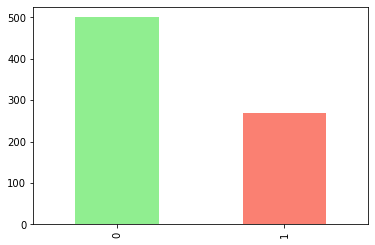

In [14]:
df["Outcome"].value_counts().plot(kind="bar", color=["lightgreen", "salmon"]);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# Check are there any missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Diabetes according to pregnancies

In [18]:
pd.crosstab(df.Pregnancies, df.Outcome)

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


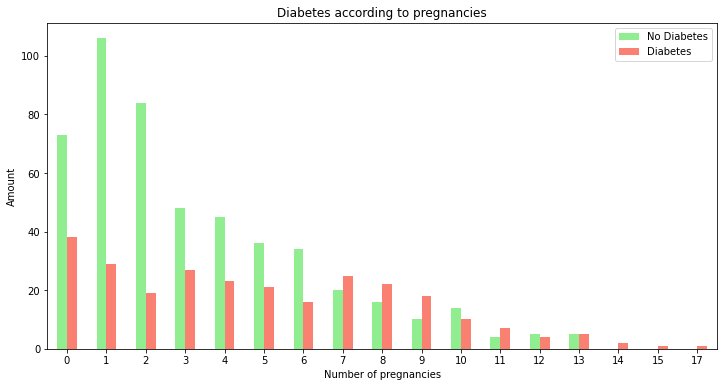

In [19]:
# Plotting bar graph
pd.crosstab(df.Pregnancies, df.Outcome).plot(kind="bar",
                                             figsize=(12, 6),
                                             color=["lightgreen", "salmon"])

plt.title("Diabetes according to pregnancies")
plt.xlabel("Number of pregnancies")
plt.ylabel("Amount")
plt.legend(["No Diabetes", "Diabetes"])
plt.xticks(rotation=0);

## Diabetes accoring to BloodPressure

In [20]:
pd.crosstab(df.BloodPressure, df.Outcome)

Outcome,0,1
BloodPressure,,
0,19,16
24,1,0
30,1,1
38,1,0
40,0,1
44,4,0
46,2,0
48,4,1
50,8,5


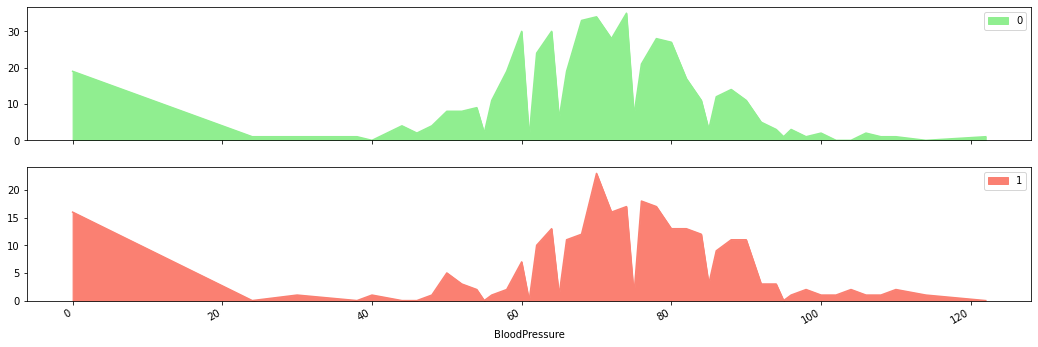

In [21]:
# Plotting area plot
pd.crosstab(df["BloodPressure"], df["Outcome"]).plot(kind="area",
                                                     subplots=True,
                                                     figsize=(18, 6),
                                                     color=["lightgreen", "salmon"]);


### Age vs Insulin for Diabetes

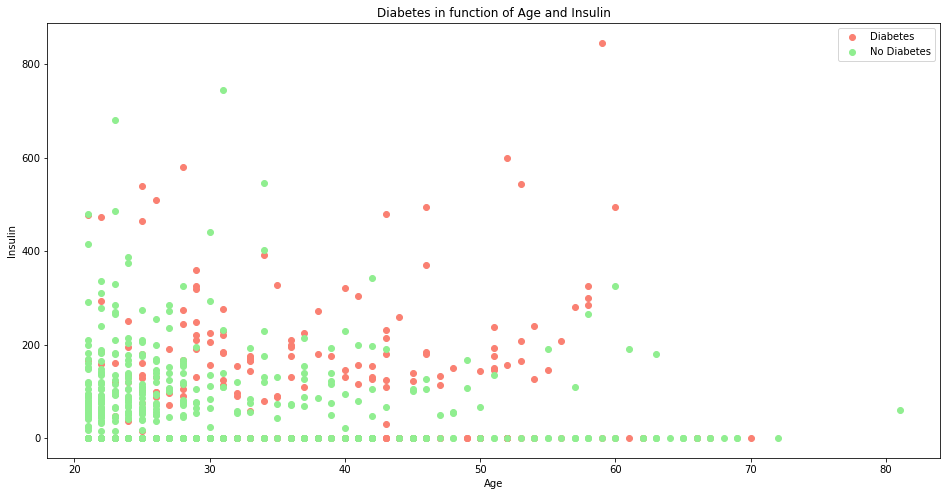

In [22]:
# Create a scatter plot
plt.figure(figsize=(16, 8))

# Scatter with positive examples
plt.scatter(df.Age[df.Outcome==1],
            df.Insulin[df.Outcome==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.Age[df.Outcome==0],
            df.Insulin[df.Outcome==0],
            c="lightgreen")

plt.title("Diabetes in function of Age and Insulin")
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend(["Diabetes", "No Diabetes"]);

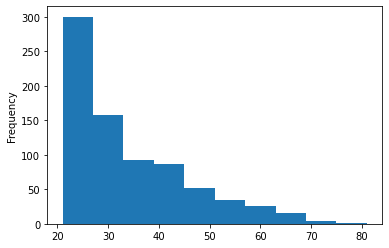

In [23]:
# Check destribution of age column with a histogram
df.Age.plot.hist();

#### Correlation Matrix

In [24]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


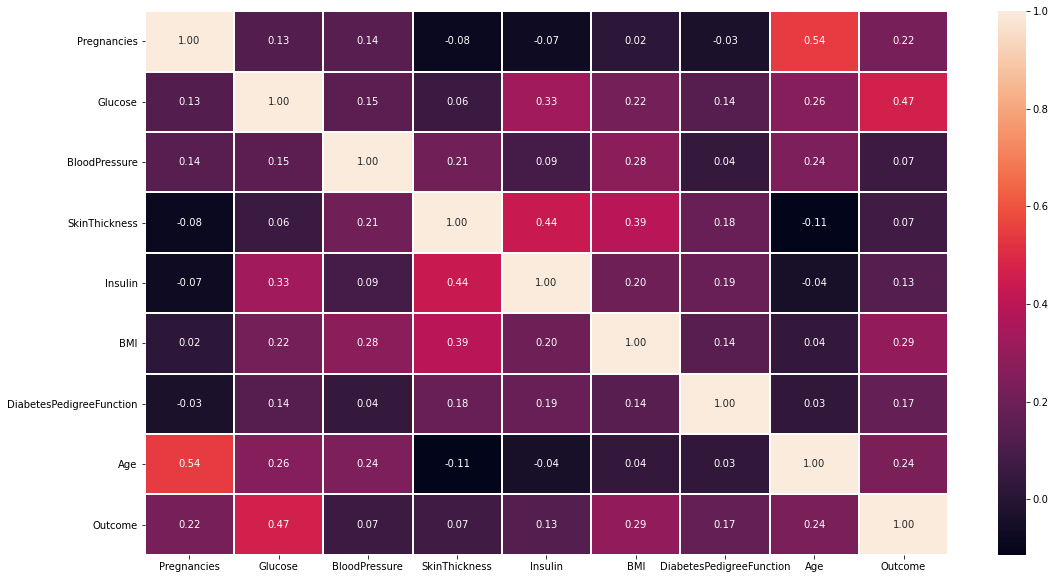

In [25]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=1,
                 fmt=".2f");
                 #cmap="RdYlGn")

### Modelling

In [26]:
# Split the data into X and y
X = df.drop("Outcome", axis=1)
y = df.Outcome

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [28]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
# Split into train and test 
np.random.seed(33)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [30]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
85,2,110,74,29,125,32.4,0.698,27
339,7,178,84,0,0,39.9,0.331,41
414,0,138,60,35,167,34.6,0.534,21
37,9,102,76,37,0,32.9,0.665,46
259,11,155,76,28,150,33.3,1.353,51
...,...,...,...,...,...,...,...,...
658,11,127,106,0,0,39.0,0.190,51
578,10,133,68,0,0,27.0,0.245,36
728,2,175,88,0,0,22.9,0.326,22
391,5,166,76,0,0,45.7,0.340,27


In [31]:
y_train

85     0
339    1
414    1
37     1
259    1
      ..
658    0
578    0
728    0
391    1
20     0
Name: Outcome, Length: 614, dtype: int64

In [32]:
# Compare all mean values with Pregnancies
df.groupby(df["Pregnancies"]).mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
0,123.000000,67.153153,22.270270,81.675676,34.290090,0.520838,27.603604,0.342342
1,112.748148,67.792593,24.437037,98.674074,31.372593,0.486496,27.370370,0.214815
2,110.796117,63.252427,21.601942,85.844660,30.583495,0.491660,27.194175,0.184466
3,123.586667,66.586667,20.080000,87.453333,30.425333,0.432147,29.026667,0.360000
4,125.117647,70.029412,15.882353,69.441176,32.141176,0.446353,32.779412,0.338235
5,118.859649,76.210526,17.385965,57.298246,33.192982,0.396421,39.035088,0.368421
6,120.800000,68.420000,17.640000,63.580000,30.290000,0.429520,39.340000,0.320000
7,136.444444,70.777778,20.288889,84.466667,32.631111,0.443622,41.111111,0.555556
8,131.736842,75.184211,17.315789,92.815789,31.568421,0.504711,45.368421,0.578947


In [33]:
# How many missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
# How many zero values
print(f"Number of zeros in Glucose is : {df.Glucose.value_counts()[0]}")
print(f"number of zeros in BloodPressure is : {df.BloodPressure.value_counts()[0]}")
print(f"number of zeros in SkinThickness is : {df.SkinThickness.value_counts()[0]}")
print(f"number of zeros in Insulin is : {df.Insulin.value_counts()[0]}")
print(f"number of zeros in BMI is : {df.BMI.value_counts()[0]}")
#print(f"number of zeros in DiabetesPedigreeFunction is : {df.DiabetesPedigreeFunction.value_counts()[0]}")
#print(f"number of zeros in Age is : {df.Age.value_counts()[0]}")
print("number of rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))

Number of zeros in Glucose is : 5
number of zeros in BloodPressure is : 35
number of zeros in SkinThickness is : 227
number of zeros in Insulin is : 374
number of zeros in BMI is : 11
number of rows missing age: 0


### Fill the zero values 

In [35]:
imputer = SimpleImputer(missing_values=0, strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [36]:
len(X_train), len(X_test)

(614, 154)

## Apply algorithms 

### 1. RandomForest Classifier
### 2. Keighbours Classifier
### 3. Logistic Regression

In [37]:
# Put models in a dictionary
models = {"RandomForest classifier": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    np.random.seed(33)
    # Make a dictionary to keep model score
    model_score = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_score
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [38]:
model_score = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_score

/Users/charlesgeorge/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest classifier': 0.7337662337662337,
 'KNN': 0.6948051948051948,
 'Logistic Regression': 0.7597402597402597}

#### Model comparison

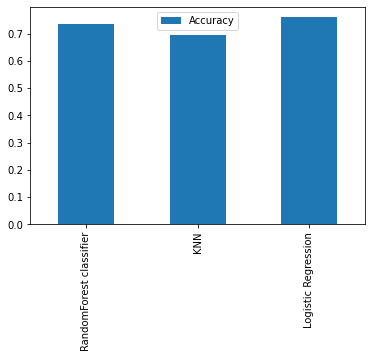

In [39]:
model_compare = pd.DataFrame(model_score, index=["Accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning (by hand)

In [64]:
# Tune KNN
train_scores = []
test_scores = []

# Create a list of different n_neighbors values
neighbors = range(1, 35)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through differnt n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Append the trian scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Append the test scores
    test_scores.append(knn.score(X_test, y_test))
    


In [65]:
train_scores

[1.0,
 0.8469055374592834,
 0.8420195439739414,
 0.8078175895765473,
 0.7866449511400652,
 0.7850162866449512,
 0.7768729641693811,
 0.7866449511400652,
 0.7654723127035831,
 0.7671009771986971,
 0.7719869706840391,
 0.7719869706840391,
 0.7671009771986971,
 0.7638436482084691,
 0.7654723127035831,
 0.7654723127035831,
 0.7687296416938111,
 0.7687296416938111,
 0.7703583061889251,
 0.7654723127035831,
 0.7687296416938111,
 0.7638436482084691,
 0.758957654723127,
 0.762214983713355,
 0.757328990228013,
 0.752442996742671,
 0.758957654723127,
 0.758957654723127,
 0.7703583061889251,
 0.760586319218241,
 0.760586319218241,
 0.7654723127035831,
 0.760586319218241,
 0.762214983713355]

In [66]:
test_scores

[0.7077922077922078,
 0.7142857142857143,
 0.7272727272727273,
 0.7272727272727273,
 0.6948051948051948,
 0.7077922077922078,
 0.6623376623376623,
 0.7012987012987013,
 0.7142857142857143,
 0.7207792207792207,
 0.7142857142857143,
 0.7272727272727273,
 0.7272727272727273,
 0.7337662337662337,
 0.7207792207792207,
 0.7337662337662337,
 0.7207792207792207,
 0.7402597402597403,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7467532467532467,
 0.7402597402597403,
 0.7662337662337663,
 0.7337662337662337,
 0.7532467532467533,
 0.7597402597402597,
 0.7597402597402597,
 0.7402597402597403,
 0.7597402597402597,
 0.7402597402597403,
 0.7727272727272727,
 0.7467532467532467]

In [67]:
max(neighbors)

34

maximum test scores on KNN data: 77.27%


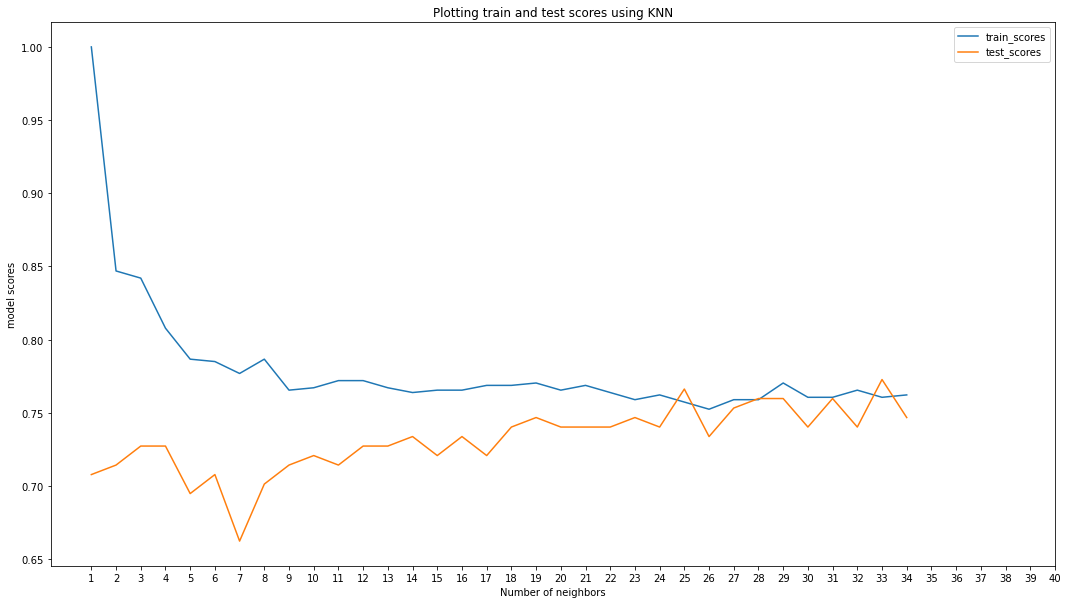

In [68]:
# Plotting train and test scores
plt.figure(figsize=(18, 10))
plt.plot(neighbors, train_scores, label="train_scores")
plt.plot(neighbors, test_scores, label="test_scores")
plt.title("Plotting train and test scores using KNN")
plt.xlabel("Number of neighbors")
plt.ylabel("model scores")
plt.xticks(np.arange(1, 41, 1))
plt.legend()


print(f"maximum test scores on KNN data: {max(test_scores)*100:.2f}%")
max_knn_value = max(test_scores)

## Hyperparameter tuning with RandomizedSearchCV
we are going to tune

    * LogisticRegression
    * RandomForestClassifier
    
   using RandomizedSearchCV
    

In [45]:
# Create a hyperparameter grid for LogisticRegressiabson
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

#### Tune LogisticRegression






In [46]:
# Setup a random seed
np.random.seed(33)

# Setup a random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [48]:
rs_log_reg.score(X_test, y_test)

0.7402597402597403

#### Tune RandomForestClassifier

In [49]:
# Setup a random seed
np.random.seed(33)

# Setup a random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
# Find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 14,
 'min_samples_leaf': 9,
 'max_depth': None}

In [51]:
# Evaluate the randomizedsearch randomforestclassifier
rs_rf.score(X_test, y_test)

0.7272727272727273

## Hyperparameter tuning by GridSearchCV

In [52]:
# Create a hyperparameter grid for LogisticRegressiabson
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

#Setup a random hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
# Find the best hyperparameter
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [54]:
# Evaluate the gridsearch for LogisticRegression
gs_log_reg.score(X_test, y_test)

0.7337662337662337

### Evalutaing tuned machine learning classifier, beyond accuracy

In [55]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [56]:
y_preds

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [57]:
y_test

456    0
684    0
510    1
434    0
31     1
      ..
325    0
191    0
67     0
719    1
603    1
Name: Outcome, Length: 154, dtype: int64

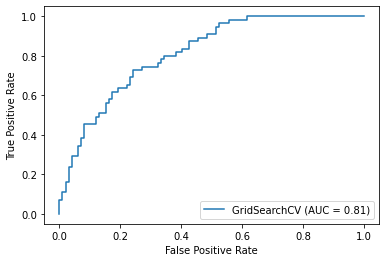

In [58]:
# Plot ROC curve and calculate AUC matrix
plot_roc_curve(gs_log_reg, X_test, y_test);